### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than $12500, $12500 - $24999, $25000 - $37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than $20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she eats at a restaurant with average expense more than $20 and
    less than $50 per person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.

In [2]:
data = pd.read_csv("data/coupons.csv")

In [3]:
df = data.copy()

df = df.rename(
    columns={
        "passanger": "passenger",
        "Bar": "frequency[Bar]",
        "CoffeeHouse": "frequency[Coffee]",
        "CarryAway": "frequency[Takeaway]",
        "RestaurantLessThan20": "frequency[RestaurantLessThan20]",
        "Restaurant20To50": "frequency[RestaurantBetween20And50]",
    }
)


df["direction"] = np.where(df["direction_same"] == 1, "same", "opposite")
df["timeToDestination"] = ""
df.loc[df["toCoupon_GEQ5min"] == 1, "timeToDestination"] = "Under 15 min"
df.loc[df["toCoupon_GEQ15min"] == 1, "timeToDestination"] = "Between 15 and 25min"
df.loc[df["toCoupon_GEQ25min"] == 1, "timeToDestination"] = "Above 25 min"
df["accepted_coupon"] = df["Y"].map({1: "Yes", 0: "No"})

df = df[
    [
        "age",
        "gender",
        "education",
        "occupation",
        "income",
        "maritalStatus",
        "has_children",
        "frequency[Bar]",
        "frequency[Takeaway]",
        "frequency[Coffee]",
        "frequency[RestaurantLessThan20]",
        "frequency[RestaurantBetween20And50]",
        "destination",
        "timeToDestination",
        "car",
        "direction",
        "passenger",
        "weather",
        "temperature",
        "time",
        "coupon",
        "expiration",
        "accepted_coupon",
    ]
]

2. Investigate the dataset for missing or problematic data.

In [4]:
for i in df:
    if df[i].isnull().sum() > 0:
        print(i, df[i].isnull().sum())

frequency[Bar] 107
frequency[Takeaway] 151
frequency[Coffee] 217
frequency[RestaurantLessThan20] 130
frequency[RestaurantBetween20And50] 189
car 12576


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# * car: too many missing values, dropping column
# * others: very few rows, dropping the rows
df = df.drop('car', axis=1, errors='ignore').dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 22 to 12683
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   age                                  12079 non-null  object
 1   gender                               12079 non-null  object
 2   education                            12079 non-null  object
 3   occupation                           12079 non-null  object
 4   income                               12079 non-null  object
 5   maritalStatus                        12079 non-null  object
 6   has_children                         12079 non-null  int64 
 7   frequency[Bar]                       12079 non-null  object
 8   frequency[Takeaway]                  12079 non-null  object
 9   frequency[Coffee]                    12079 non-null  object
 10  frequency[RestaurantLessThan20]      12079 non-null  object
 11  frequency[RestaurantBetween20And50]  12079 no

4. What proportion of the total observations chose to accept the coupon? 



accepted_coupon
Yes    0.569335
No     0.430665
Name: proportion, dtype: float64


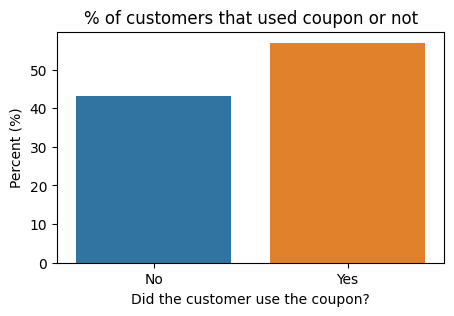

In [7]:
print(df['accepted_coupon'].value_counts(normalize=True))

plt.figure(figsize=(5,3))

sns.countplot(df, x='accepted_coupon', order=['No', 'Yes'], hue='accepted_coupon', hue_order=['No', 'Yes'], stat='percent')

plt.title('% of customers that used coupon or not')
plt.xlabel('Did the customer use the coupon?')
plt.ylabel('Percent (%)')

plt.tight_layout
plt.show()

5. Use a bar plot to visualize the `coupon` column.

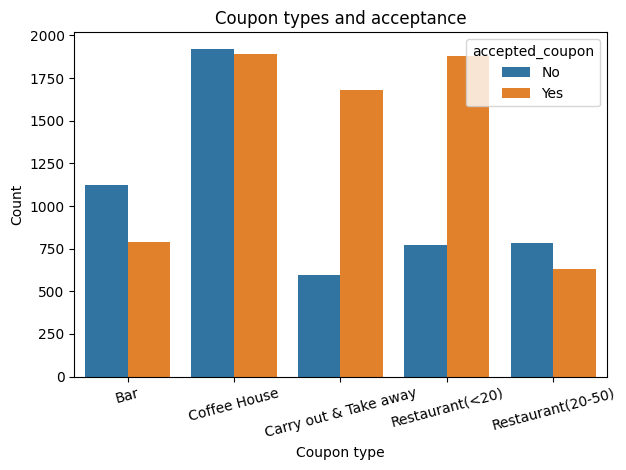

In [8]:
coupon_order = ['Bar', 'Coffee House', 'Carry out & Take away', 'Restaurant(<20)', 'Restaurant(20-50)']

sns.countplot(df, order=coupon_order, hue_order=['No', 'Yes'], hue='accepted_coupon', x='coupon')

plt.title('Coupon types and acceptance')
plt.xticks(rotation=15)
plt.xlabel('Coupon type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

6. Use a histogram to visualize the temperature column.

In [9]:
df['temperature'].value_counts()

temperature
80    6222
55    3662
30    2195
Name: count, dtype: int64

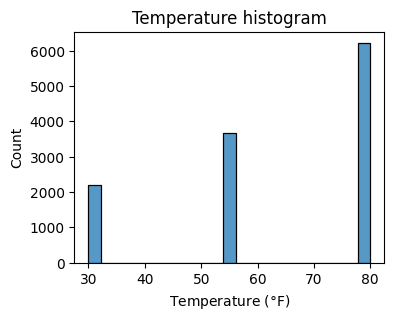

In [10]:
plt.figure(figsize=(4,3))
sns.histplot(df, x = 'temperature')
plt.title('Temperature histogram')
plt.xlabel('Temperature ($\degree$F)')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.

In [11]:
def acceptance_rate(df):
    if len(df) == 0:
        return None
    return 100*df['accepted_coupon'].value_counts(normalize=True)['Yes']

def acceptance_count(df):
    return df['accepted_coupon'].value_counts()

In [12]:
filter_coupon_bar = df['coupon'] == "Bar"
df_bar = df[filter_coupon_bar]

2. What proportion of bar coupons were accepted?


In [13]:
print('- Count:')
print(acceptance_count(df_bar))
print()
print(f"- Proportion of bar coupons accepted: {acceptance_rate(df_bar):.1f}%")

- Count:
accepted_coupon
No     1125
Yes     788
Name: count, dtype: int64

- Proportion of bar coupons accepted: 41.2%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [14]:
filter_freq_bar_low = df_bar['frequency[Bar]'].isin(['never', 'less1', '1~3'])

In [15]:
print('** Slice: Bar coupon **')
print()
print('- Low frequency count:')
print(acceptance_count(df_bar[filter_freq_bar_low]))
print()
print('- High frequency count:')
print(acceptance_count(df_bar[~filter_freq_bar_low]))
print()
print(f"- Acceptance rate for who went to a bar 3 of fewer times a month:  {acceptance_rate(df_bar[filter_freq_bar_low]):.1f}%")
print(f"- Acceptance rate for who went to a bar more than 3 times a month: {acceptance_rate(df_bar[~filter_freq_bar_low]):.1f}%")

** Slice: Bar coupon **

- Low frequency count:
accepted_coupon
No     1079
Yes     641
Name: count, dtype: int64

- High frequency count:
accepted_coupon
Yes    147
No      46
Name: count, dtype: int64

- Acceptance rate for who went to a bar 3 of fewer times a month:  37.3%
- Acceptance rate for who went to a bar more than 3 times a month: 76.2%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [16]:
filter_freq_bar_moreThan1 = df_bar['frequency[Bar]'].isin(['1~3', 'gt8', '4~8'])
filter_age_under_25 = df_bar['age'].isin(['21', 'under21'])
filter_age_over_25 = df_bar['age' ].isin(['46', '26', '31', '41', '50plus', '36'])

df_bar1Month_under_25_count = df_bar[filter_freq_bar_moreThan1 & filter_age_under_25]
df_bar1Month_over_25_count = df_bar[filter_freq_bar_moreThan1 & filter_age_over_25]

In [17]:
print('** Slice: Bar coupon / Drivers that go to a bar more than once a month')
print()
print('- Under 25 count:')
print(acceptance_count(df_bar1Month_under_25_count))
print()
print('- Over 25 count:')
print(acceptance_count(df_bar1Month_over_25_count))
print()
print(f"- Acceptance rate for who is under 25: {acceptance_rate(df_bar1Month_under_25_count):.1f}%")
print(f"- Acceptance rate for who is over 25:  {acceptance_rate(df_bar1Month_over_25_count):.1f}%")

** Slice: Bar coupon / Drivers that go to a bar more than once a month

- Under 25 count:
accepted_coupon
Yes    110
No      49
Name: count, dtype: int64

- Over 25 count:
accepted_coupon
Yes    278
No     125
Name: count, dtype: int64

- Acceptance rate for who is under 25: 69.2%
- Acceptance rate for who is over 25:  69.0%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
filter_coupon_bar = df['coupon'] == 'Bar'
filter_freq_bar = df['frequency[Bar]'].isin(['1~3', 'gt8', '4~8'])
filter_passenger = df['passenger'] != 'Kid(s)'
filter_occupation = df['occupation'] != "Farming Fishing & Forestry"

df_slice_5_testA = df[filter_coupon_bar & filter_freq_bar & filter_passenger]
df_slice_5_testB = df[filter_coupon_bar & filter_freq_bar & filter_occupation]

In [19]:
print('** Slice: Bar coupon / Drivers that go to a bar more than once a month')
print()
print('1) With passengers that were not a kid:')
print(acceptance_count(df_slice_5_testA))
print()
print('2) If occupation is farming/fishing/forestry:')
print(acceptance_count(df_slice_5_testB))
print()
print(f"- Acceptance rate for (1): {acceptance_rate(df_slice_5_testA):.1f}%")
print(f"- Acceptance rate for (2): {acceptance_rate(df_slice_5_testB):.1f}%")

** Slice: Bar coupon / Drivers that go to a bar more than once a month

1) With passengers that were not a kid:
accepted_coupon
Yes    376
No     154
Name: count, dtype: int64

2) If occupation is farming/fishing/forestry:
accepted_coupon
Yes    392
No     180
Name: count, dtype: int64

- Acceptance rate for (1): 70.9%
- Acceptance rate for (2): 68.5%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 

In [20]:
filter_coupon_bar = df['coupon'] == 'Bar'
filter_freq_bar = df['frequency[Bar]'].isin(['1~3', 'gt8', '4~8'])
filter_passenger = df['passenger'] != 'Kid(s)'
filter_maritalStatus = df['maritalStatus'] != 'Widowed'
filter_age_under_30 = df['age'].isin(['21', 'under21', '26'])
filter_cheap_moreThan4 = df['frequency[RestaurantLessThan20]'].isin(['4~8', 'gt8'])
filter_income = df['income'].isin(['$12500 - $24999', '$37500 - $49999', '$25000 - $37499', 'Less than $12500'])

df_slice_6_testA = df[filter_coupon_bar & filter_freq_bar & filter_passenger & filter_maritalStatus]
df_slice_6_testB = df[filter_coupon_bar & filter_freq_bar & filter_age_under_30]
df_slice_6_testC = df[filter_coupon_bar & filter_cheap_moreThan4 & filter_income]

df_slice_6_testD = df[filter_coupon_bar & ((filter_freq_bar & filter_passenger & filter_maritalStatus) | (filter_freq_bar & filter_age_under_30) | (filter_cheap_moreThan4 & filter_income))]

In [21]:
print('** Slice: Bar coupon')
print()
print('1) go to bars more than once a month, had passengers that were not a kid, and were not widowed:')
print(acceptance_count(df_slice_6_testA))
print()
print('2) go to bars more than once a month and are under the age of 30:')
print(acceptance_count(df_slice_6_testB))
print()
print('3) go to cheap restaurants more than 4 times a month and income is less than 50K:')
print(acceptance_count(df_slice_6_testC))
print()
print('4) 1 OR 2 OR 3:')
print(acceptance_count(df_slice_6_testC))
print()
print(f"- Acceptance rate for (1): {acceptance_rate(df_slice_6_testA):.1f}%")
print(f"- Acceptance rate for (2): {acceptance_rate(df_slice_6_testB):.1f}%")
print(f"- Acceptance rate for (3): {acceptance_rate(df_slice_6_testC):.1f}%")
print(f"- Acceptance rate for (4): {acceptance_rate(df_slice_6_testD):.1f}%")

** Slice: Bar coupon

1) go to bars more than once a month, had passengers that were not a kid, and were not widowed:
accepted_coupon
Yes    376
No     154
Name: count, dtype: int64

2) go to bars more than once a month and are under the age of 30:
accepted_coupon
Yes    232
No      86
Name: count, dtype: int64

3) go to cheap restaurants more than 4 times a month and income is less than 50K:
accepted_coupon
No     181
Yes    152
Name: count, dtype: int64

4) 1 OR 2 OR 3:
accepted_coupon
No     181
Yes    152
Name: count, dtype: int64

- Acceptance rate for (1): 70.9%
- Acceptance rate for (2): 73.0%
- Acceptance rate for (3): 45.6%
- Acceptance rate for (4): 58.7%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

- **Frequency of bar visits is a strong predictor**:
    Drivers who visit bars more than 3 times a month are much more likely to accept bar coupons (76.2%) than those who visit 3 or fewer times a month (37.3%). This suggests that targeting frequent bar-goers with bar coupons would be a highly effective strategy.

- **Age is not a significant factor**: The acceptance rate for drivers under 25 (69.2%) is very similar to the acceptance rate for drivers over 25 (69.0%) among those who go to bars more than once a month. This indicates that age may not be a crucial factor to consider when targeting customers for bar coupons.

### Coffee House coupons

In [22]:
df_coffee = df[df['coupon'] == 'Coffee House']

#### General acceptance rate

In [23]:
# Raw acceptance rate
print(acceptance_count(df_coffee))
print(acceptance_rate(df_coffee))

accepted_coupon
No     1922
Yes    1894
Name: count, dtype: int64
49.63312368972746


#### Feature distributions and acceptance rate

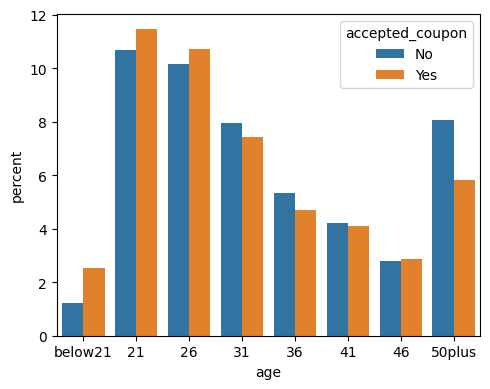

In [24]:
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
plt.figure(figsize=(5,4))
sns.countplot(df_coffee, x='age', order=age_order, hue='accepted_coupon', stat='percent')
plt.tight_layout()
plt.show()

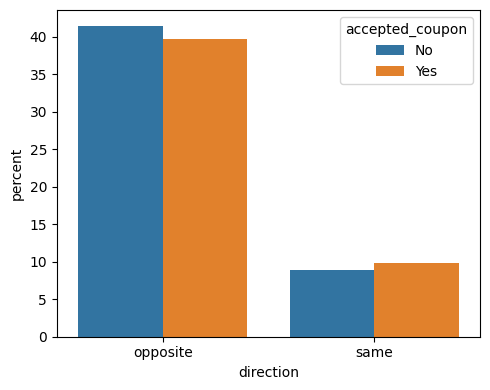

In [25]:
plt.figure(figsize=(5,4))
sns.countplot(df_coffee, x = 'direction', hue='accepted_coupon', stat='percent')
plt.tight_layout()
plt.show()

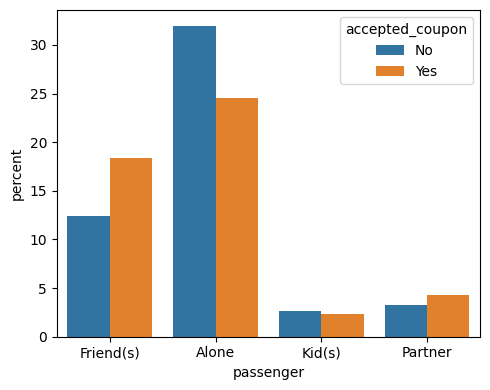

In [26]:
plt.figure(figsize=(5,4))
sns.countplot(df_coffee, x = 'passenger', hue='accepted_coupon', stat='percent')
plt.tight_layout()
plt.show()

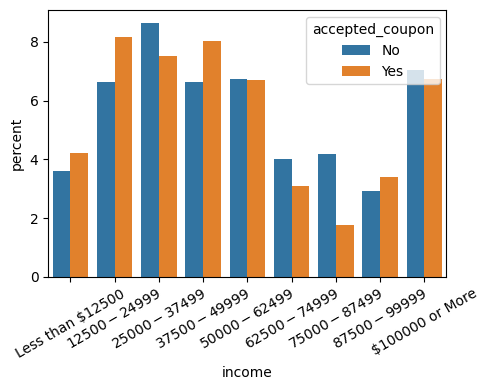

In [27]:
income_order = [
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499",
    "$37500 - $49999",
    "$50000 - $62499",
    "$62500 - $74999",
    "$75000 - $87499",
    "$87500 - $99999",
    "$100000 or More",
]

plt.figure(figsize=(5, 4))
sns.countplot(df_coffee, x="income", order=income_order, hue="accepted_coupon", stat="percent")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

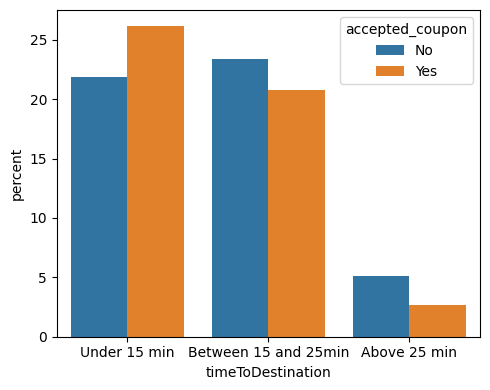

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(df_coffee, x = 'timeToDestination', hue='accepted_coupon', stat='percent')
plt.tight_layout()
plt.show()

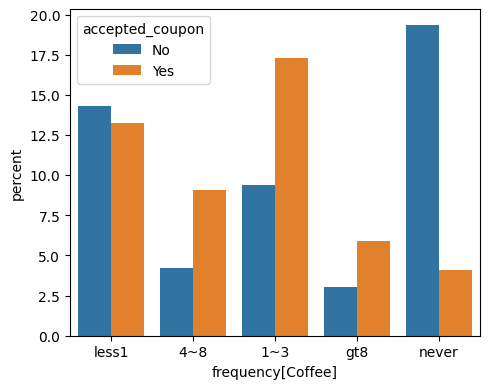

In [29]:
plt.figure(figsize=(5,4))
sns.countplot(df_coffee, x = 'frequency[Coffee]', hue='accepted_coupon', stat='percent')
plt.tight_layout()
plt.show()

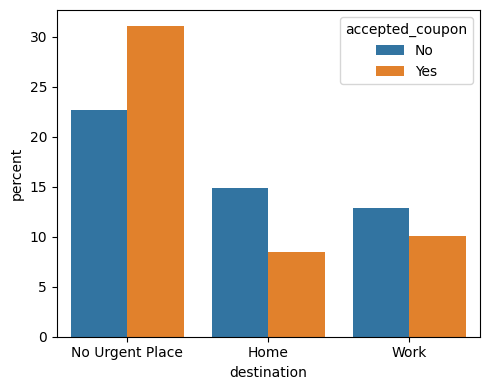

In [30]:
plt.figure(figsize=(5,4))
sns.countplot(df_coffee, x = 'destination', hue='accepted_coupon', stat='percent')
plt.tight_layout()
plt.show()

In [31]:
def list_rates(df, A):
    counts = df[[A, 'accepted_coupon']].value_counts(normalize=True, sort=False).reset_index()
    print(f"{A}:")
    for key in counts[A].unique():
        yes = counts.loc[(counts[A] == key) & (counts['accepted_coupon'] == 'Yes')]['proportion'].values[0]
        no  = counts.loc[(counts[A] == key) & (counts['accepted_coupon'] == 'No')]['proportion'].values[0]
        print(f'Acceptance rate for weather="{key}": {100*yes/(yes+no):.1f}')

#### Filtering one feature

In [32]:
filter_age_below_30 = df_coffee['age'].isin(['below21', '21', '26'])
print(f'If driver is under 30: {acceptance_rate(df_coffee[filter_age_below_30]):.1f}%')
print(f'If driver is above 30: {acceptance_rate(df_coffee[~filter_age_below_30]):.1f}%')

filter_direction = df_coffee['direction'] == 'same'
print(f'If driver is going the same way of the coupon place: {acceptance_rate(df_coffee[filter_direction]):.1f}%')
print(f'If driver is going the opposite way of the coupon place: {acceptance_rate(df_coffee[~filter_direction]):.1f}%')

filter_passenger_alone = df_coffee['passenger'] == 'Alone'
print(f'If driver is alone: {acceptance_rate(df_coffee[filter_passenger_alone]):.1f}%')
print(f'If driver is with friends, kids or partner: {acceptance_rate(df_coffee[~filter_passenger_alone]):.1f}%')

filter_low_income = df_coffee['income'].isin([
    "Less than $12500",
    "$12500 - $24999",
    "$25000 - $37499",
    "$37500 - $49999",
])
print(f'If driver has income lower than 50 thousand: {acceptance_rate(df_coffee[filter_low_income]):.1f}%')
print(f'If driver has income higher than 50 thousand: {acceptance_rate(df_coffee[~filter_low_income]):.1f}%')

filter_destination_distance = df_coffee['timeToDestination'] == 'Under 15 min'
print(f'If the coupon destination is within 15 minutes of driving: {acceptance_rate(df_coffee[filter_destination_distance]):.1f}%')
print(f'If the coupon destination takes longer than 15 minutes to drive to: {acceptance_rate(df_coffee[~filter_destination_distance]):.1f}%')

filter_freq_high = df_coffee['frequency[Coffee]'].isin(['1~3', '4~8', 'gt8'])
print(f'If driver goes to a coffee house more than 1 time per month: {acceptance_rate(df_coffee[filter_freq_high]):.1f}%')
print(f'If driver does not go to a coffee house every month: {acceptance_rate(df_coffee[~filter_freq_high]):.1f}%')

filter_destination_not_urgent = df_coffee['destination'] == 'No Urgent Place'
print(f'If driver is not headed to an urgent place: {acceptance_rate(df_coffee[filter_destination_not_urgent]):.1f}%')
print(f'If driver is headed home or to work: {acceptance_rate(df_coffee[~filter_destination_not_urgent]):.1f}%')

list_rates(df_coffee, 'weather')

If driver is under 30: 52.9%
If driver is above 30: 46.8%
If driver is going the same way of the coupon place: 52.7%
If driver is going the opposite way of the coupon place: 48.9%
If driver is alone: 43.4%
If driver is with friends, kids or partner: 57.7%
If driver has income lower than 50 thousand: 52.3%
If driver has income higher than 50 thousand: 46.6%
If the coupon destination is within 15 minutes of driving: 54.5%
If the coupon destination takes longer than 15 minutes to drive to: 45.1%
If driver goes to a coffee house more than 1 time per month: 65.9%
If driver does not go to a coffee house every month: 34.0%
If driver is not headed to an urgent place: 57.8%
If driver is headed home or to work: 40.1%
weather:
Acceptance rate for weather="Rainy": 51.6
Acceptance rate for weather="Snowy": 42.8
Acceptance rate for weather="Sunny": 50.1


#### Filtering combination of features

In [33]:
df_filter = df_coffee[filter_age_below_30 & ~filter_passenger_alone & filter_freq_high & filter_destination_not_urgent]
print(f'Age under 30, not driving alone, frequent visits to coffee house, not going to an urgent place: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[filter_age_below_30 & filter_passenger_alone & filter_freq_high & filter_destination_not_urgent]
print(f'Age under 30, driving alone, frequent visits to coffee house, not going to an urgent place: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[~filter_age_below_30 & ~filter_passenger_alone & filter_freq_high]
print(f'Age above 30, not driving alone, frequent visits to coffee house: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[filter_age_below_30 & ~filter_freq_high]
print(f'Age under 30, driving alone, no frequent visits to coffee house: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[filter_age_below_30 & filter_passenger_alone]
print(f'Age under 30, driving alone: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[filter_age_below_30 & ~filter_passenger_alone]
print(f'Age under 30, not driving alone: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[filter_direction & filter_passenger_alone]
print(f'Driving alone, driving to the same direction as coffee house: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[~filter_direction & filter_passenger_alone]
print(f'Driving alone, driving the opposite direction as coffee house: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[filter_direction & ~filter_passenger_alone]
print(f'Not driving alone, driving to the same direction as coffee house: {acceptance_rate(df_filter):.1f}%')

df_filter = df_coffee[~filter_direction & ~filter_passenger_alone]
print(f'Not driving alone, driving the opposite direction as coffee house: {acceptance_rate(df_filter):.1f}%')

Age under 30, not driving alone, frequent visits to coffee house, not going to an urgent place: 79.2%
Age under 30, driving alone, frequent visits to coffee house, not going to an urgent place: 72.6%
Age above 30, not driving alone, frequent visits to coffee house: 71.5%
Age under 30, driving alone, no frequent visits to coffee house: 35.1%
Age under 30, driving alone: 45.6%
Age under 30, not driving alone: 62.4%
Driving alone, driving to the same direction as coffee house: 52.5%
Driving alone, driving the opposite direction as coffee house: 39.4%
Not driving alone, driving to the same direction as coffee house: 54.5%
Not driving alone, driving the opposite direction as coffee house: 57.9%


### Findings:

The acceptance rate for coffee house coupons is influenced by several factors:

- High Acceptance (70%+):
    - Young drivers (under 30) who visit coffee houses frequently, especially if they are not alone and are not headed somewhere urgently (72.6% to 79.2%)
    - Older drivers (30 or older) who are not alone and visit coffee houses frequently (71.5%)
  
- Moderate Acceptance (around 50%):
    - Drivers who are alone and are driving in the same direction as the coffee house (52.5%)
    - Drivers who are not alone and are driving in either direction (54.5% for the same direction and 57.9% for the opposite direction)

- Low Acceptance (below 50%):
    - Young drivers (under 30) who are alone and do not visit coffee houses frequently (35.1%)
    - Drivers who are alone and are driving in the opposite direction of the coffee house (39.4%)

Overall key factors:

- Frequency of coffee house visits is the most influential factor, with frequent visitors being much more likely to accept the coupon.
- Presence of passengers such as Friends or Partner also plays a significant role, increasing the acceptance rate
- Age and direction have a more moderate impact on acceptance.

These findings suggest that targeting frequent coffee house visitors who are likely to have passengers would be the most effective strategy for a coffee house coupon campaign, particularly if they are young (under 30) and not headed somewhere urgently.